In [ ]:
import os
import sys

import importlib
import torch
import logging
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle, Patch

import pandas as pd
import numpy as np
from tqdm import tqdm
from munch import Munch

from src.data.fingerprint import calculate_fingerprint_similarity
from src.data.datazoo import get_dataloaders
from src.toolkit.config import build_config

# Initialize FedMedMNIST LF and LFQ datasets with the corresponding experiment configuration to trigger Fingerprint Computation (or load to save time)

In [2]:
# PACFL_LF_cfg = build_config('configs/experiments/FedMedMNISTLF_PACFL.yaml')
# PACFL_LF_dl = get_dataloaders(PACFL_LF_cfg.data, True, PACFL_LF_cfg)
# PACFL_LFQ_cfg = build_config('configs/experiments/FedMedMNISTLFQ_PACFL.yaml')
# PACFL_LFQ_dl = get_dataloaders(PACFL_LFQ_cfg.data, True, PACFL_LFQ_cfg)

# FFP_LF_cfg = build_config('configs/experiments/FedMedMNISTLF_FFP.yaml')
# FFP_LF_dl = get_dataloaders(FFP_LF_cfg.data, True, FFP_LF_cfg)
# FFP_LFQ_cfg = build_config('configs/experiments/FedMedMNISTLFQ_FFP.yaml')
# FFP_LFQ_dl = get_dataloaders(FFP_LFQ_cfg.data, True, FFP_LFQ_cfg)

In [3]:
raw_LF_path = 'data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_raw_FPs.tdump'
raw_LFQ_path = 'data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_raw_FPs.tdump'

fea_LF_path = 'data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_features_MobileNetS_FPs.tdump'
fea_LFQ_path = 'data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_features_MobileNetS_FPs.tdump'

raw_LF_fp = torch.load(raw_LF_path)
raw_LFQ_fp = torch.load(raw_LFQ_path)

fea_LF_fp = torch.load(fea_LF_path)
fea_LFQ_fp = torch.load(fea_LFQ_path)

# Compute Similarity Matrices (or load to save time)

In [4]:
# raw_LF_sim, raw_LF_calc = calculate_fingerprint_similarity(raw_LF_fp, 'PrincipalAngles')
# np.save('data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_raw_FPs_PAsim.npy', raw_LF_sim)
# raw_LFQ_sim, raw_LFQ_calc = calculate_fingerprint_similarity(raw_LFQ_fp, 'PrincipalAngles')
# np.save('data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_raw_FPs_PAsim.npy', raw_LFQ_sim)

# fea_LF_sim, fea_LF_calc = calculate_fingerprint_similarity(fea_LF_fp, 'PrincipalAngles')
# np.save('data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_features_MobileNetS_FPs_PAsim.npy', fea_LF_sim)
# fea_LFQ_sim, fea_LFQ_calc = calculate_fingerprint_similarity(fea_LFQ_fp, 'PrincipalAngles')
# np.save('data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_features_MobileNetS_FPs_PAsim.npy', fea_LFQ_sim)

In [5]:
raw_LF_sim = np.load('data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_raw_FPs_PAsim.npy')
raw_LFQ_sim = np.load('data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_raw_FPs_PAsim.npy')

fea_LF_sim = np.load('data/fingerprints/NC_173_partition_mode_IID_dataset_FedMedMNISTLF_seed_42_SVD_features_MobileNetS_FPs_PAsim.npy')
fea_LFQ_sim = np.load('data/fingerprints/NC_173_partition_mode_hetereo_dirichlet_dirichlet_alpha_0.3_dataset_FedMedMNISTLFQ_seed_42_SVD_features_MobileNetS_FPs_PAsim.npy')

# Illustration of Similarity Matrices

In [6]:
reduced_client_names = ['Blood', 'Breast', 'Derma', 'Organ{A,C,S}', 'Pneumonia', 'Retina' ]
client_colors = ['crimson', 'orange', 'darkgreen', 'lightseagreen', 'navy', 'darkviolet']
num_colors = [24, 1, 14, 123, 9, 2]

def add_ds_color_patches(ax):
    # Add colored patches outside the plot aligned with the right side of the ordinate axes
    thickness = 15
    sep=0.15
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # Extend the x-axis limit to include the colored patches
    ax.set_xlim([xmin-thickness, xmax])

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    last_offset = 0
    for nc, c in zip(num_colors, client_colors):
        rect = Rectangle((xmin, ymax+last_offset), thickness-5, nc, color=c, hatch='//\\\\', fc='none')
        last_offset += nc
        ax.add_patch(rect)
    rect = Rectangle((xmin+thickness-5-sep, ymax), sep, 173, color='black')
    rect = Rectangle((xmin+thickness-sep, ymax), sep, 173, color='black')
    ax.add_patch(rect)

/tmp/ipykernel_611630/1546601718.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_elements = [Patch(color=c, edgecolor='black', label=n, hatch='//\\\\', fc='none') for c, n in zip(client_colors, reduced_client_names)]


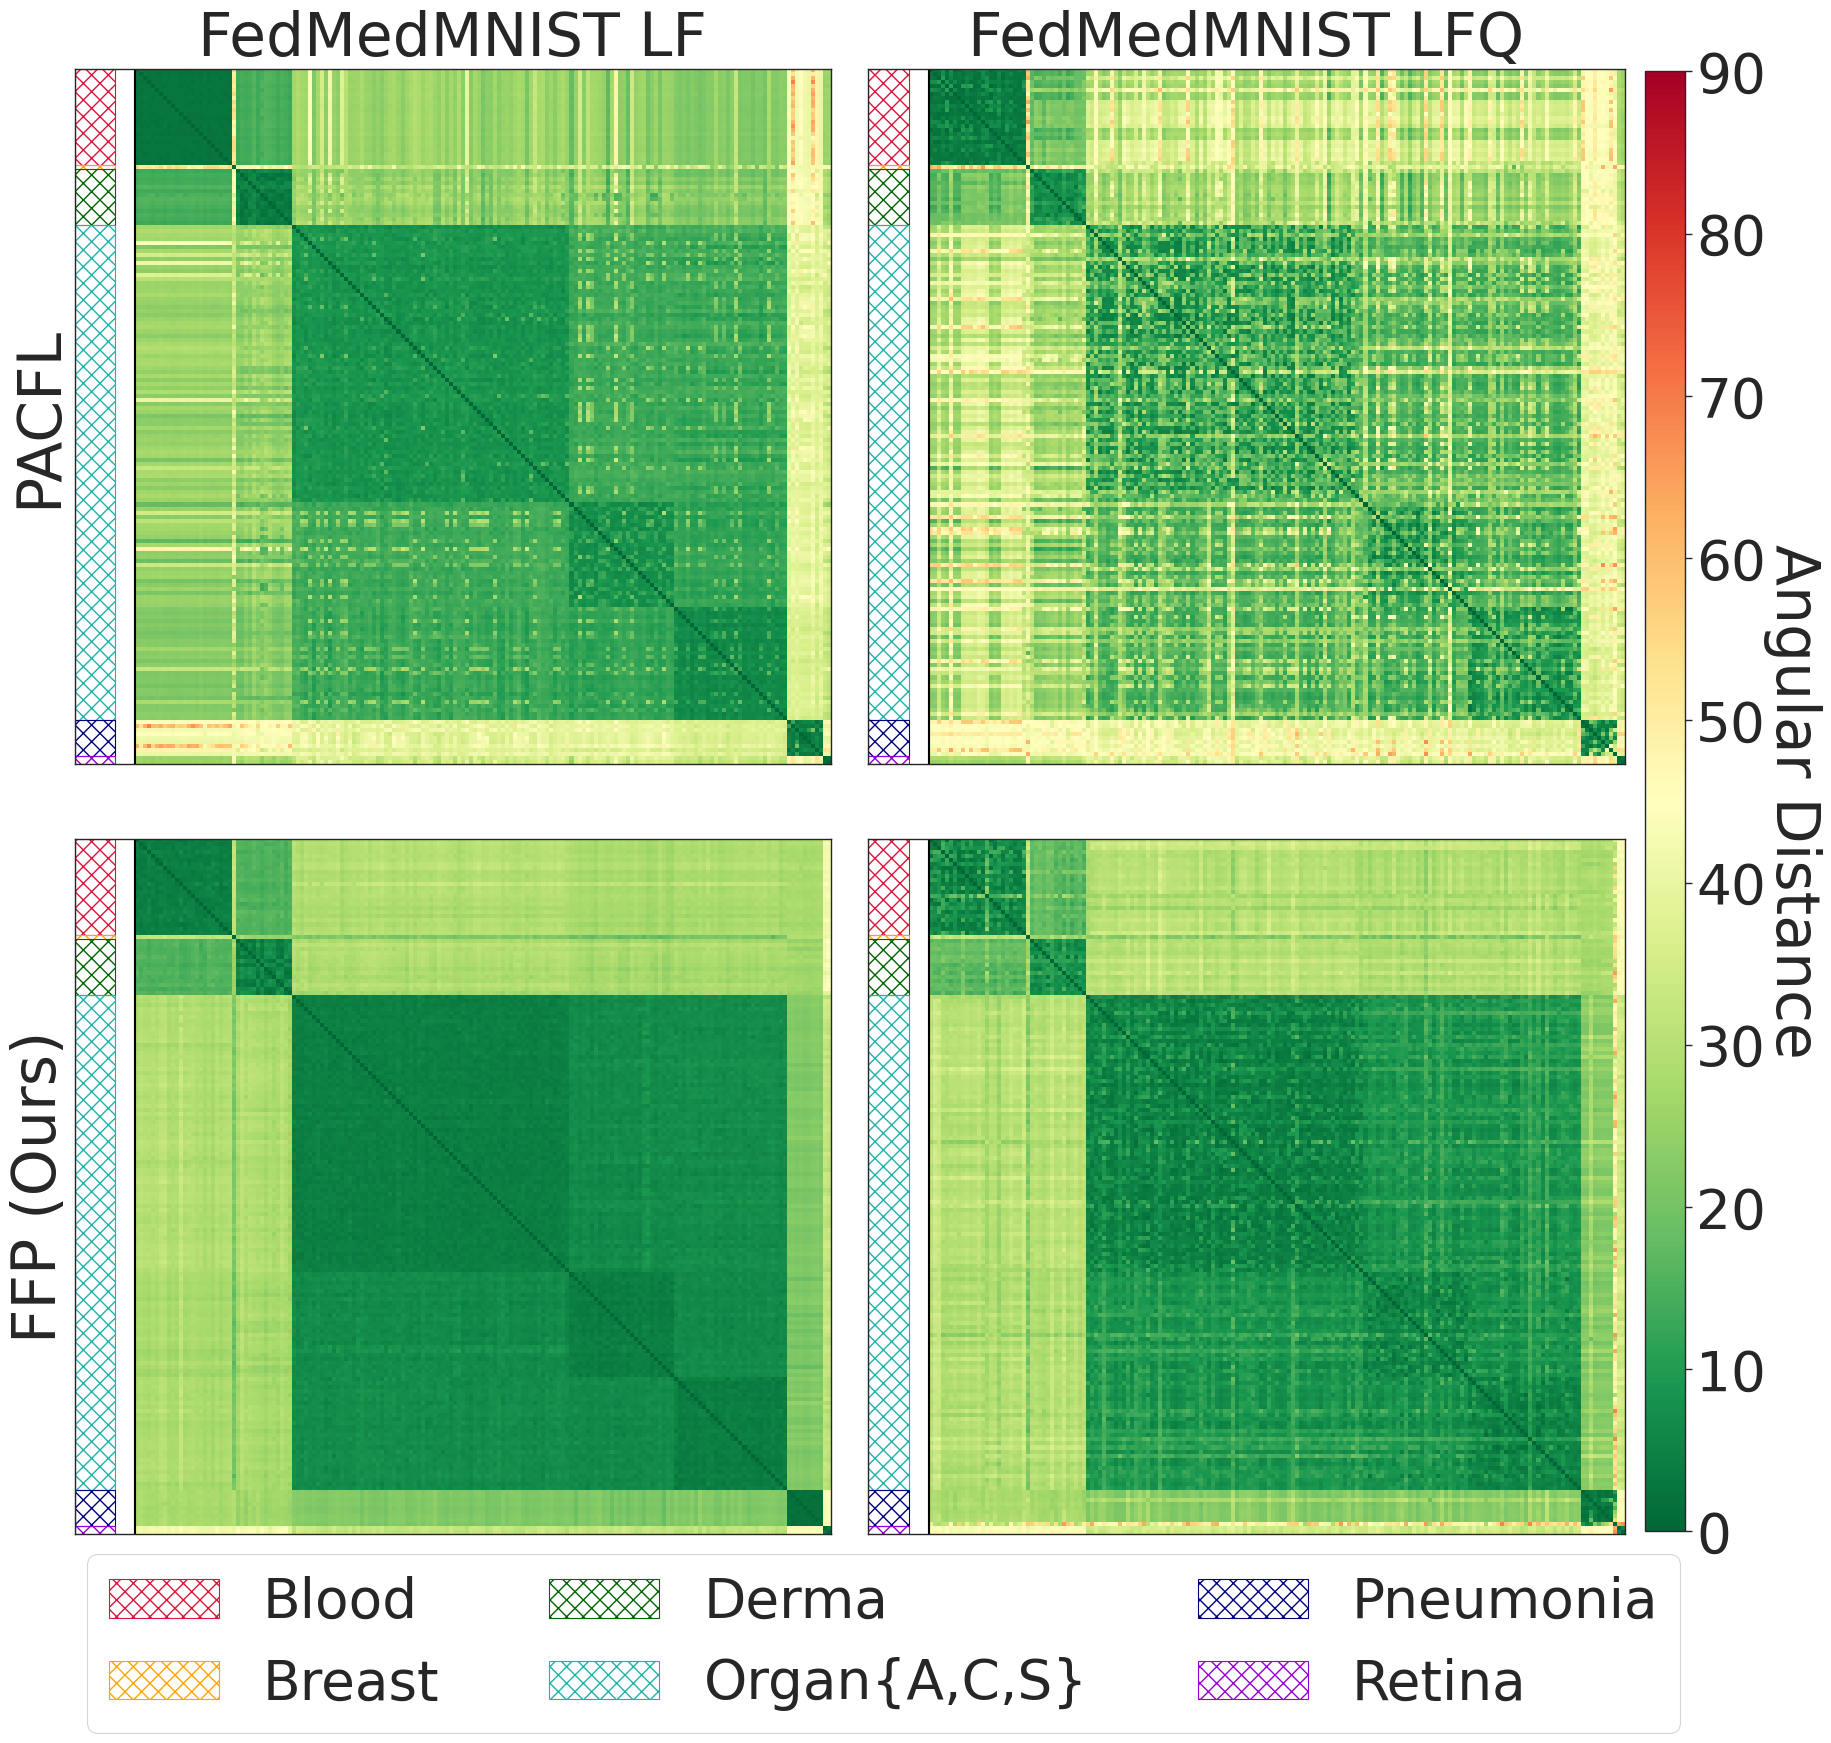

In [7]:
font_scale = 4.5
figsize = (20,20)
high_is_good = False
client_names = [k.split('_0')[0][8:] if '_0' in k else '' for k in raw_LF_fp.keys()]
num_clients = len(client_names)


sns.set_style("ticks")
sns.set_context("paper", font_scale=font_scale, rc={"text.usetex": True})

if high_is_good:
    cmap = 'RdYlGn'
    bar_label = 'Similarity'
else:
    cmap = 'RdYlGn_r'
    bar_label = 'Angular Distance'


#create figure with 2x2 plots
fig, axs = plt.subplots(2, 2, figsize=figsize, sharex=False, sharey=False)

#plot raw iid top left
axs[0,0].imshow(raw_LF_sim, cmap=cmap, interpolation='nearest', vmin=0, vmax=90)

#plot raw niid top right
axs[0,1].imshow(raw_LFQ_sim, cmap=cmap, interpolation='nearest', vmin=0, vmax=90)

#plot fea iid bottom left
axs[1,0].imshow(fea_LF_sim, cmap=cmap, interpolation='nearest', vmin=0, vmax=90)

#plot fea niid bottom right
axs[1,1].imshow(fea_LFQ_sim, cmap=cmap, interpolation='nearest', vmin=0, vmax=90)

titles = ['FedMedMNIST LF', 'FedMedMNIST LFQ', '', '']
y_labels = ['PACFL', '', 'FFP (Ours)', '']

#turn off tick labels and  tick marks for all axes
for ax, title, y_label in zip(axs.flatten(), titles, y_labels):
    ax.set(xticks=[], yticks=[])
    add_ds_color_patches(ax)
    ax.set_title(title)
    ax.set_ylabel(y_label)


#make colorbar fit the main plot
cax = fig.add_axes([0.91, 0.13, 0.02, 0.73])
cbar = fig.colorbar(axs[0,0].images[0], cax=cax)
cbar.set_label(bar_label, rotation=270, labelpad=40)


#add a ledegend at the bottom that shows the client colors
legend_elements = [Patch(color=c, edgecolor='black', label=n, hatch='//\\\\', fc='none') for c, n in zip(client_colors, reduced_client_names)]
axs[1,0].legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=(1.07, -0.325), frameon=True)

#remove all the whitespaces between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0)
    
plt.show()
plt.close()